# Оглавление:
* [Fashion MNIST](#1)
* [NN - ОДНОСЛОЙНАЯ НЕЙРОННАЯ СЕТЬ](#2)
* [MNN - МНОГОСЛОЙНАЯ НЕЙРОННАЯ СЕТЬ](#3)
* [CNN - СВЕРТОЧНАЯ НЕЙРОННАЯ СЕТЬ](#4)

# Fashion MNIST <a class="anchor" id="1"></a>

Fashion MNIST - это набор изображений одежды, состоящий из обучающего набора (60 000 образцов) и тестового набора (10 000 образцов). Каждый образец представляет собой изображение в оттенках серого 28x28, и метку одного из 10 классов. Fashion MNIST является аналогом стандартного MNIST, который содежрит большое число рукописных цифр. Структура образцов Fashion MNIST и MNIST схожа, изображения имеют такой же размер.

### Описание

Каждое изображение размером 28 пикселей в высоту и 28 пикселей в ширину, всего 784 пикселя. Каждый пиксель имеет одно связанное с ним значение пикселя, указывающее яркость или темноту этого пикселя, причем более высокие числа означают более темный. Это значение пикселя представляет собой целое число от 0 до 255. Наборы данных для обучения и тестирования содержат 785 столбцов. Первый столбец состоит из меток класса и обозначает предмет одежды. Остальные столбцы содержат значения пикселей связанного изображения:

* Чтобы найти пиксель на изображении, предположим, что мы разложили x как x = i * 28 + j, где i и j - целые числа от 0 до 27. Пиксель расположен в строке i и столбце j матрицы 28 x 28;
* Например, pixel31 указывает пиксель, который находится в четвертом столбце слева и во второй строке сверху.

### Метки

Каждому обучающему и тестовому образцу присвоена одна из следующих меток:

0. Футболка
1. Штаны
2. Пуловер
3. Платье
4. Плащ
5. Сандалии
6. Рубашка
7. Кроссовки
8. Сумка
9. Ботинки

In [3]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Подготовка данных

Загружаем датасет Fashion MNIST.

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Создадим список всех классов

In [3]:
classes = ["Футболка", "Штаны", "Пуловер", "Платье", "Плащ", "Сандалии", "Рубашка", "Кроссовки", "Сумка", "Ботинки"]

Рассмотрим некоторые образцы одежды.

In [4]:
classes[y_train[0]]

'Ботинки'

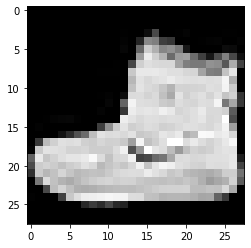

In [5]:
x = x_train[0].reshape([28, 28]);
plt.gray()
plt.imshow(x)

In [6]:
classes[y_train[1]]

'Футболка'

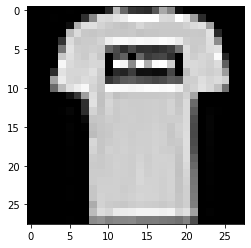

In [7]:
x = x_train[1].reshape([28, 28]);
plt.gray()
plt.imshow(x)

In [8]:
classes[y_train[2]]

'Футболка'

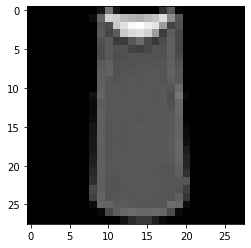

In [9]:
x = x_train[2].reshape([28, 28]);
plt.gray()
plt.imshow(x)

Прежде всего, стоит обратить внимание на то, что при загрузке изображения мы получаем многомерный массив размером 28x28.

In [10]:
x_train.shape

(60000, 28, 28)

Есть два варианта, либо мы можем оставить его в таком формате, либо преобразовать в одномерный вектор размера 784, мы выберем второй вариант.

In [11]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [12]:
x_train.shape

(60000, 784)

Мы создали тренировочный и тестовый набор данных, но не создали проверочный. Дело в том, что мы сможем задать параметр `validation_split` при применении метода `fit()`. Параметр `validation_split` определяет соотношение между размером тестовых и проверочных выборок. Так например, `validation_split = 0.3` будет означать, что в качестве проверочного набора будут использованы 30% тестового набора.

Также нам необходимо масштабировать наши данные. Интенсивность пикселя задается значением от 0 до 255. Чтобы данный параметр был от 0 до 1 делим значения на 255.

In [13]:
x_train = x_train / 255
x_test = x_test / 255

Остался последний вопрос, до того как мы приступим к построению модели. В наших данных разреженные метки, то есть каждому объекту присвоен индекс от 0 до 9. Мы можем оставить данные в таком виде, но лучше будет для каждого образца создать вектор вида

1, 0, 0, 0, 0, 0, 0, 0, 0, 0 - для первого класса

0, 1, 0, 0, 0, 0, 0, 0, 0, 0 - для второго класса

$\vdots$

0, 0, 0, 0, 0, 0, 0, 0, 0, 1 - для десятого класса

Преобразовать разреженные метки (т.е. индексы классов) в двоичные векторные метки (т.е. в вектора состоящие из 0 и 1), можно использовать функцию `kerass.utils.to_categorical()`. Форма меток влияет на выбор функции потерь при компилировании модели, см. далее.

In [14]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

# NN - ОДНОСЛОЙНАЯ НЕЙРОННАЯ СЕТЬ <a class="anchor" id="2"></a>

Создаем последовательную модель (sequential model). Это самый простой вид модели Keras для нейронных сетей: она состоит из одного стека последовательно соединенных слоев.

In [15]:
model = Sequential()

Самым первым слоем мы могли бы добавить "плоский" слой. Он предназначен для преобразовании каждого входного изображения в одномерный массив. Но поскольку мы вручную преобразовали наше изображение в одномерный вектор, мы не нуждаемся в данном слое.

In [16]:
# model.add(keras.layers.Flatten(input_shape = [28, 28]))

Добавляем внутренний слой с 500 нейронами, 784 входами, функцией активации `ReLU`.

In [17]:
model.add(Dense(500, input_dim=784, activation="relu"))

Добавляем выходной слой с 10 нейронами (по одному на класс), иcпользуя функцию активации `softmax` (поскольку классы являются уникальными).

In [18]:
model.add(Dense(10, activation="softmax"))

### Компиляция модели

In [19]:
model.compile(loss="categorical_crossentropy", 
              optimizer="SGD", 
              metrics=["accuracy"])

### loss="categorical_crossentropy"

Как уже упоминалось ранее, выбор функции потерь будет зависеть от вида меток классов. Если метки разрежены, то задаем параметр `loss = "sparse_categorical_crossentropy"`, для двоичных векторных меток задается параметр `loss="categorical_crossentropy"`.

### optimizer="SGD"

Аргумент `optimiser` определяет метод оптимизации, в нашем случае это метод стохастического градиентного спуска `sgd`. При использовании оптимизатора `"sgd"` важно настроить скорость обучения. По умолчанию она равна `0,01`. Чтобы задать свое значение нужно определить `optimizer = keras.optimizers.SGD(learning_rate = …)`, вместо значения `"sgd"`.

### metrics=["accuracy"]

Метрика `accuracy`.

---

Рассмотрим описание модели. У нас есть два внутренних слоя **dense_2** и **dense_3**, один выходной слой **dense_4**

1. Первый внутренний слой имеет $784 \cdot 500 $ весов соединения $+ 500$ свободных членов, итого $392 500$ параметров.
2. Выходной слой имеет $500 \cdot 10 $ весов соединения $+ 10$ свободных членов, итого $5010$ параметров.

Суммарное число параметров $545,810$

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 10)                5010      
                                                                 
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________


Мы можем рассмотреть веса и свободные члены для каждого слоя (по умолчанию, свободные члены будут заданы нулями).

In [21]:
weights, biases = model.layers[1].get_weights()

In [22]:
weights

array([[ 0.05479734,  0.0453643 ,  0.07833501, ..., -0.04868756,
        -0.01722556, -0.01446135],
       [-0.04310477,  0.03635512, -0.01198728, ...,  0.01084566,
        -0.08257544, -0.08094005],
       [-0.0337862 , -0.10762186, -0.10093347, ...,  0.0726338 ,
         0.03165186, -0.02033183],
       ...,
       [ 0.08558965,  0.07045085,  0.04390023, ...,  0.02230669,
         0.08779988, -0.08884238],
       [-0.09976816,  0.04323565, -0.09764817, ...,  0.02154358,
         0.08754035, -0.09887278],
       [-0.10182919,  0.06960853,  0.04055388, ...,  0.10504355,
        -0.0353443 ,  0.0924175 ]], dtype=float32)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Обучение модели

* batch_size - размер пакетов, на которые мы делим все наши данные, по умолчанию 32
* epochs - число эпох или итераций
* validation_split - доля проверочных данных от тестовых

In [24]:
history = model.fit(x_train, y_train, 
                    batch_size=32, 
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100
1500/1500 [==============================] - 16s 10ms/step - loss: 0.7394 - accuracy: 0.7641 - val_loss: 0.5660 - val_accuracy: 0.8016
Epoch 2/100
1500/1500 [==============================] - 14s 9ms/step - loss: 0.5179 - accuracy: 0.8260 - val_loss: 0.4968 - val_accuracy: 0.8282
Epoch 3/100
1500/1500 [==============================] - 14s 9ms/step - loss: 0.4721 - accuracy: 0.8397 - val_loss: 0.4640 - val_accuracy: 0.8373
Epoch 4/100
1500/1500 [==============================] - 16s 11ms/step - loss: 0.4461 - accuracy: 0.8464 - val_loss: 0.4401 - val_accuracy: 0.8489
Epoch 5/100
1500/1500 [==============================] - 17s 11ms/step - loss: 0.4279 - accuracy: 0.8530 - val_loss: 0.4346 - val_accuracy: 0.8499
Epoch 6/100
1500/1500 [==============================] - 17s 11ms/step - loss: 0.4139 - accuracy: 0.8573 - val_loss: 0.4147 - val_accuracy: 0.8556
Epoch 7/100
1500/1500 [==============================] - 15s 10ms/step - loss: 0.4024 - accuracy: 0.8613 - val_loss: 0.4

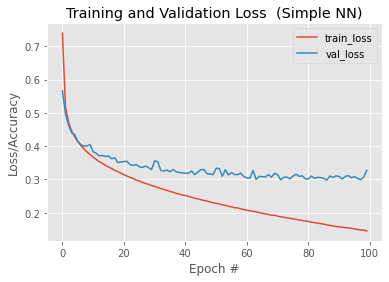

In [25]:
# строим графики потерь и точности
N = np.arange(0, 100)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
#plt.plot(N, history.history["accuracy"], label="train_acc")
#plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Loss  (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
#plt.savefig(args["plot"])

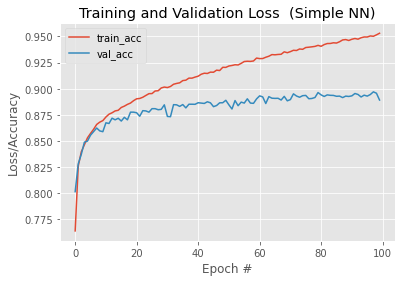

In [26]:
# строим графики потерь и точности
N = np.arange(0, 100)
plt.style.use("ggplot")
plt.figure()
#plt.plot(N, history.history["loss"], label="train_loss")
#plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Loss  (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
#plt.savefig(args["plot"])

Число $1500/1500$ под эпохами является округленным вверх результатом деления объема обучающего набора на размер пакета `batch_size = 32` $50000/32 = 1562.5$.

1. 0.8016

2. 0.8282

3. 0.8373

$\vdots$

10. 0.8589

$\vdots$

20. 0.8776

$\vdots$

30. 0.8846

$\vdots$

40. 0.8851

$\vdots$

50. 0.8889

$\vdots$

60. 0.8903

$\vdots$

70. 0.8884

$\vdots$

80. 0.8963

$\vdots$

90. 0.8926

$\vdots$

100. 0.8892

### параметры

In [27]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 1500}

### эпохи

In [28]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

### доп. параметры

In [29]:
history.history

{'loss': [0.7394083142280579,
  0.517903208732605,
  0.4720609188079834,
  0.44610393047332764,
  0.42790934443473816,
  0.4138669967651367,
  0.4023665487766266,
  0.39184796810150146,
  0.3825342059135437,
  0.37466421723365784,
  0.3670364320278168,
  0.3602537512779236,
  0.353434681892395,
  0.3482971489429474,
  0.3421391546726227,
  0.33763381838798523,
  0.3328969180583954,
  0.32717692852020264,
  0.3237254321575165,
  0.3185332715511322,
  0.3143313229084015,
  0.3103155195713043,
  0.3061977028846741,
  0.3029773235321045,
  0.29803362488746643,
  0.29524362087249756,
  0.29141923785209656,
  0.28797033429145813,
  0.28542912006378174,
  0.2817516326904297,
  0.27884864807128906,
  0.27606961131095886,
  0.2726978063583374,
  0.2699330151081085,
  0.26690125465393066,
  0.26426634192466736,
  0.2616265118122101,
  0.2581848204135895,
  0.2562647759914398,
  0.25321173667907715,
  0.2515922486782074,
  0.24906755983829498,
  0.24645309150218964,
  0.243612140417099,
  0.24161

### Оценка модели

Оценим качество модели на проверочных данных. Доля верных ответов на проверочных данных составляет 88%.

In [30]:
model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 2s 6ms/step - loss: 0.3499 - accuracy: 0.8823


[0.34987181425094604, 0.8823000192642212]

# MNN - МНОГОСЛОЙНАЯ НЕЙРОННАЯ СЕТЬ <a class="anchor" id="3"></a>

# 2 внутренних слоя

### 500 и 100
---

### 500 и 500
---

### 500 и 1000

* нейронов входного слоя = 500
* нейронов внутреннего слоя = 1000
* batch_size = 32 (по умолчанию)
* epochs = 100

In [31]:
model_best = Sequential()
model_best.add(Dense(500, input_dim=784, activation="relu"))
model_best.add(Dense(1000, input_dim=784, activation="relu"))
model_best.add(Dense(10, activation="softmax"))

model_best.compile(loss="categorical_crossentropy", 
              optimizer="SGD", 
              metrics=["accuracy"])

history = model_best.fit(x_train, y_train, 
                    batch_size=32, 
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

model_best.evaluate(x_test, y_test, verbose=1)

Epoch 1/100
1500/1500 [==============================] - 28s 18ms/step - loss: 0.7368 - accuracy: 0.7613 - val_loss: 0.5358 - val_accuracy: 0.8129
Epoch 2/100
1500/1500 [==============================] - 28s 18ms/step - loss: 0.4950 - accuracy: 0.8287 - val_loss: 0.4836 - val_accuracy: 0.8297
Epoch 3/100
1500/1500 [==============================] - 27s 18ms/step - loss: 0.4474 - accuracy: 0.8434 - val_loss: 0.4370 - val_accuracy: 0.8481
Epoch 4/100
1500/1500 [==============================] - 27s 18ms/step - loss: 0.4185 - accuracy: 0.8541 - val_loss: 0.4123 - val_accuracy: 0.8572
Epoch 5/100
1500/1500 [==============================] - 27s 18ms/step - loss: 0.3986 - accuracy: 0.8603 - val_loss: 0.3984 - val_accuracy: 0.8582
Epoch 6/100
1500/1500 [==============================] - 27s 18ms/step - loss: 0.3829 - accuracy: 0.8651 - val_loss: 0.4029 - val_accuracy: 0.8569
Epoch 7/100
1500/1500 [==============================] - 28s 18ms/step - loss: 0.3696 - accuracy: 0.8678 - val_loss: 0

[0.4081532061100006, 0.8899999856948853]

In [42]:
model_best.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 500)               392500    
                                                                 
 dense_3 (Dense)             (None, 1000)              501000    
                                                                 
 dense_4 (Dense)             (None, 10)                10010     
                                                                 
Total params: 903,510
Trainable params: 903,510
Non-trainable params: 0
_________________________________________________________________


In [32]:
model_best.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 2s 5ms/step - loss: 0.4082 - accuracy: 0.8900


[0.4081532061100006, 0.8899999856948853]

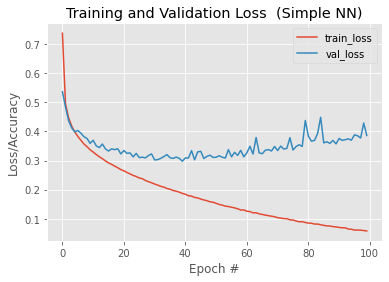

In [33]:
# строим графики потерь и точности
N = np.arange(0, 100)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
#plt.plot(N, history.history["accuracy"], label="train_acc")
#plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Loss  (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
#plt.savefig(args["plot"])

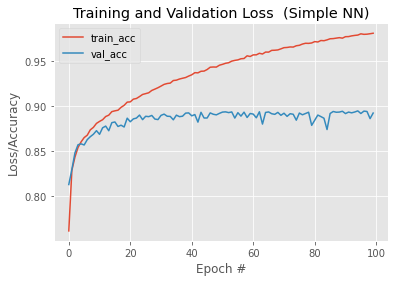

In [38]:
# строим графики потерь и точности
N = np.arange(0, 100)
plt.style.use("ggplot")
plt.figure()
#plt.plot(N, history.history["loss"], label="train_loss")
#plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Loss  (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
#plt.savefig(args["plot"])

Видим, что ошибка на проверочном наборе начинает расти после 40 эпохи, это значит что модель переобучается.

# 3 внутренних слоя

### 500 и 300 и 100
---

### 100 и 300 и 500
---

### 500 и 500 и 500

In [51]:
model3layer = Sequential()
model3layer.add(Dense(500, input_dim=784, activation="relu"))
model3layer.add(Dense(500, activation="relu"))
model3layer.add(Dense(500, activation="relu"))
model3layer.add(Dense(10, activation="softmax"))

In [52]:
model3layer.compile(loss="categorical_crossentropy", 
              optimizer="SGD", 
              metrics=["accuracy"])

In [53]:
model3layer.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 500)               392500    
                                                                 
 dense_10 (Dense)            (None, 500)               250500    
                                                                 
 dense_11 (Dense)            (None, 500)               250500    
                                                                 
 dense_12 (Dense)            (None, 10)                5010      
                                                                 
Total params: 898,510
Trainable params: 898,510
Non-trainable params: 0
_________________________________________________________________


In [54]:
history = model3layer.fit(x_train, y_train, 
                    batch_size=32, 
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100
1500/1500 [==============================] - 29s 18ms/step - loss: 0.7339 - accuracy: 0.7573 - val_loss: 0.5734 - val_accuracy: 0.7878
Epoch 2/100
1500/1500 [==============================] - 27s 18ms/step - loss: 0.4812 - accuracy: 0.8315 - val_loss: 0.4958 - val_accuracy: 0.8192
Epoch 3/100
1500/1500 [==============================] - 27s 18ms/step - loss: 0.4316 - accuracy: 0.8488 - val_loss: 0.4240 - val_accuracy: 0.8533
Epoch 4/100
1500/1500 [==============================] - 27s 18ms/step - loss: 0.4008 - accuracy: 0.8595 - val_loss: 0.3963 - val_accuracy: 0.8636
Epoch 5/100
1500/1500 [==============================] - 27s 18ms/step - loss: 0.3797 - accuracy: 0.8658 - val_loss: 0.3814 - val_accuracy: 0.8641
Epoch 6/100
1500/1500 [==============================] - 27s 18ms/step - loss: 0.3614 - accuracy: 0.8727 - val_loss: 0.3695 - val_accuracy: 0.8706
Epoch 7/100
1500/1500 [==============================] - 28s 19ms/step - loss: 0.3473 - accuracy: 0.8759 - val_loss: 0

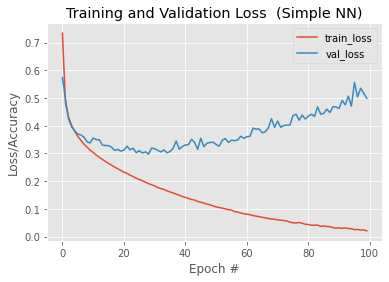

In [55]:
# строим графики потерь и точности
N = np.arange(0, 100)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
#plt.plot(N, history.history["accuracy"], label="train_acc")
#plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Loss  (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
#plt.savefig(args["plot"])

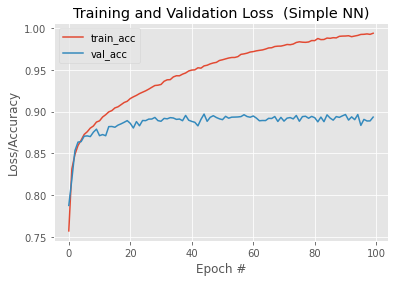

In [56]:
# строим графики потерь и точности
N = np.arange(0, 100)
plt.style.use("ggplot")
plt.figure()
#plt.plot(N, history.history["loss"], label="train_loss")
#plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Loss  (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
#plt.savefig(args["plot"])

# CNN - СВЕРТОЧНАЯ НЕЙРОННАЯ СЕТЬ <a class="anchor" id="4"></a>

In [4]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

# 1 сверточный слой

Итак, в нашей задаче каждый объект представлен в виде изображения 28х28 пикселей в градациях серого:

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [6]:
x_train = x_train / 255
x_test = x_test / 255

In [7]:
# Убедимся, что наши данные имеют следующий вид (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

### Создаем модель

In [9]:
modelCNN = Sequential()

**Первый сверточный слой** будет сверточный двухмерный (Conv2D)

In [10]:
modelCNN.add(Conv2D(64, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))

`kernel_size=3` — размер ядра 3х3

`64` это число ядер свертки (сколько признаков будем искать)

Параметр `padding='same'` означает, что выходная карта признаков на каждом канале должна быть той же размерностью, что и исходное изображение, т.е. 28х28 элементов. Фактически, это означает добавление значений на границах двумерных данных (обычно нулей), чтобы центр ядра фильтра мог размещаться над граничными элементами:

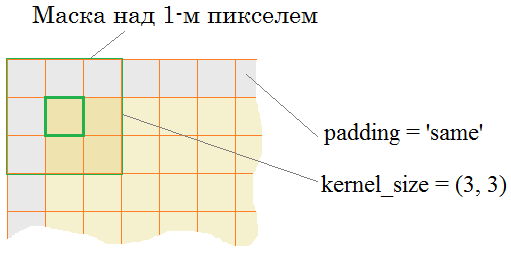

In [2]:
from IPython.display import Image
Image(filename='pic2.png')

Добавим в нашу модель операцию (слой) **MaxPooling2D**:

In [12]:
modelCNN.add(MaxPooling2D((2, 2), strides=2))

Следующий слой в соответствии с концепцией СНС должен укрупнять масштаб полученных признаков. Как мы говорили на предыдущем занятии, для этого чаще всего используется операция MaxPooling.

Здесь `pool_size` – размер окна, в котором выбирается максимальное значение; `strides` – шаг сканирования по координатам плоскости; `padding='valid'` – не добавлять нулевых значений на границах (соответственно рамка не смещается за пределы поля признаков); `data_format` – формат входных данных.


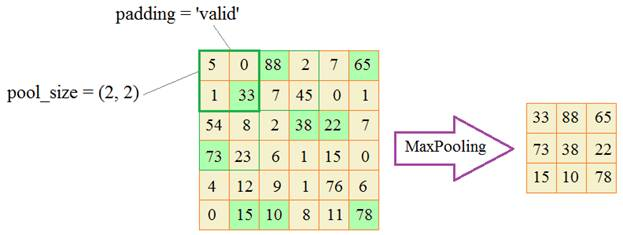

In [3]:
Image(filename='maxpool.jpg')

#### Создаем вектор для полносвязной сети

In [13]:
modelCNN.add(Flatten())

Преобразовываем полученный тензор в единый вектор, подаем его на полносвязную сеть из 128 входных нейронов и 10 нейронов выходного слоя.

#### Создаем однослойный перцептрон

In [14]:
modelCNN.add(Dense(128, activation='relu'))

#### Создадим выходной слой

In [15]:
modelCNN.add(Dense(10, activation='softmax'))

---

Давайте выведем структуру этой сети и посмотрим на число весовых коэффициентов в каждом слое:

In [16]:
print(modelCNN.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1605760   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,607,690
Trainable params: 1,607,690
Non-trainable params: 0
______________________________________________

### Компиляция

In [17]:
# Адам: метод стохастической оптимизации
modelCNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Обучение модели

In [18]:
historyCNN = modelCNN.fit(x_train, y_train, 
                    batch_size=32, 
                    epochs=30,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/30
1500/1500 [==============================] - 49s 32ms/step - loss: 0.3909 - accuracy: 0.8612 - val_loss: 0.2947 - val_accuracy: 0.8938
Epoch 2/30
1500/1500 [==============================] - 51s 34ms/step - loss: 0.2626 - accuracy: 0.9047 - val_loss: 0.2788 - val_accuracy: 0.8980
Epoch 3/30
1500/1500 [==============================] - 47s 32ms/step - loss: 0.2174 - accuracy: 0.9205 - val_loss: 0.2451 - val_accuracy: 0.9142
Epoch 4/30
1500/1500 [==============================] - 42s 28ms/step - loss: 0.1833 - accuracy: 0.9329 - val_loss: 0.2312 - val_accuracy: 0.9157
Epoch 5/30
1500/1500 [==============================] - 42s 28ms/step - loss: 0.1512 - accuracy: 0.9441 - val_loss: 0.2557 - val_accuracy: 0.9123
Epoch 6/30
1500/1500 [==============================] - 42s 28ms/step - loss: 0.1271 - accuracy: 0.9529 - val_loss: 0.2524 - val_accuracy: 0.9175
Epoch 7/30
1500/1500 [==============================] - 43s 28ms/step - loss: 0.1051 - accuracy: 0.9616 - val_loss: 0.2811 -

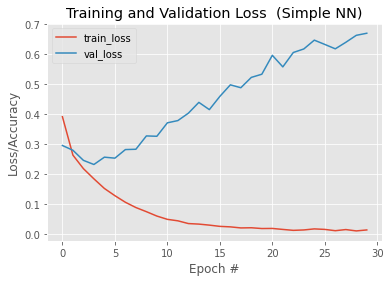

In [20]:
# строим графики потерь и точности
N = np.arange(0, 30)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, historyCNN.history["loss"], label="train_loss")
plt.plot(N, historyCNN.history["val_loss"], label="val_loss")
#plt.plot(N, historyCNN.history["accuracy"], label="train_acc")
#plt.plot(N, historyCNN.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Loss  (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
#plt.savefig(args["plot"])

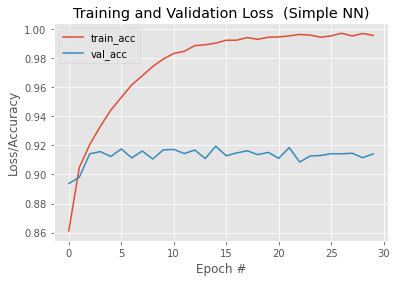

In [21]:
# строим графики потерь и точности
N = np.arange(0, 30)
plt.style.use("ggplot")
plt.figure()
#plt.plot(N, historyCNN.history["loss"], label="train_loss")
#plt.plot(N, historyCNN.history["val_loss"], label="val_loss")
plt.plot(N, historyCNN.history["accuracy"], label="train_acc")
plt.plot(N, historyCNN.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Loss  (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
#plt.savefig(args["plot"])

# 2 сверточных слоя

In [56]:
modelCNN2 = Sequential()

In [57]:
modelCNN2.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))

In [58]:
modelCNN2.add(MaxPooling2D((2, 2), strides=2))

In [59]:
modelCNN2.add(Conv2D(64, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))

In [60]:
modelCNN2.add(MaxPooling2D((2, 2), strides=2))

In [61]:
modelCNN2.add(Flatten())

In [62]:
modelCNN2.add(Dense(128, activation='relu'))

In [63]:
modelCNN2.add(Dense(10, activation='softmax'))

In [64]:
print(modelCNN2.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 3136)              0         
                                                                 
 dense_9 (Dense)             (None, 128)              

Смотрите, первый слой содержит 320 параметров, второй – 18496, следующий слой полносвязной НС – 401536 и последний – 1290. Почему получаются такие величины? В первом слое у нас 32 фильтра и каждый имеет 10 весовых коэффициентов, всего 320 параметров:

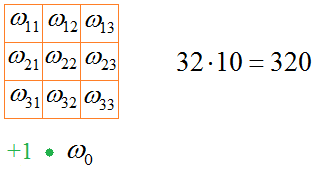

In [5]:
Image(filename='w1.png')

На вход следующего слоя подается 32-канальный тензор. Он обрабатывается 64 различными фильтрами. Каждый фильтр состоит из ядра 3х3х10 плюс смещение, то есть, всего имеем:

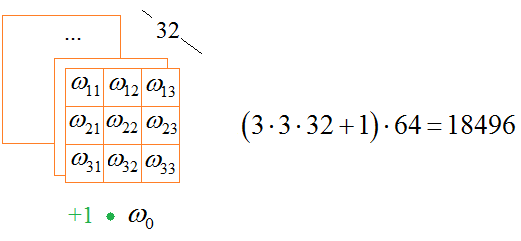

In [6]:
Image(filename='w2.png')

На следующий полносвязный слой подается тензор 7х7х64, вытянутый в вектор, то есть, имеем:

$$7 \cdot 7 \cdot 64 + 1 = 3137$$

нейронов (плюс один биас). Все эти нейроны соединены со всеми 128 нейронами следующего слоя. Получаем число связей:

$$3137 \cdot 128 = 401 536$$

И, аналогично для последнего слоя. Здесь 128 нейронов плюс биас:

$$128 + 1 = 129$$

связаны со всеми 10 выходными нейронами:

$$129 \cdot 10 = 1290$$

Давайте теперь обучим эту сеть и посмотрим на результаты ее работы.

# Адам: метод стохастической оптимизации
modelCNN2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Обучение модели

In [66]:
historyCNN2 = modelCNN2.fit(x_train, y_train, 
                    batch_size=32, 
                    epochs=30,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/30
1500/1500 [==============================] - 42s 28ms/step - loss: 0.4231 - accuracy: 0.8489 - val_loss: 0.3263 - val_accuracy: 0.8808
Epoch 2/30
1500/1500 [==============================] - 42s 28ms/step - loss: 0.2790 - accuracy: 0.9001 - val_loss: 0.2884 - val_accuracy: 0.8919
Epoch 3/30
1500/1500 [==============================] - 43s 28ms/step - loss: 0.2344 - accuracy: 0.9142 - val_loss: 0.2477 - val_accuracy: 0.9082
Epoch 4/30
1500/1500 [==============================] - 43s 29ms/step - loss: 0.2000 - accuracy: 0.9260 - val_loss: 0.2281 - val_accuracy: 0.9168
Epoch 5/30
1500/1500 [==============================] - 43s 28ms/step - loss: 0.1708 - accuracy: 0.9366 - val_loss: 0.2318 - val_accuracy: 0.9169
Epoch 6/30
1500/1500 [==============================] - 44s 29ms/step - loss: 0.1462 - accuracy: 0.9472 - val_loss: 0.2450 - val_accuracy: 0.9155
Epoch 7/30
1500/1500 [==============================] - 43s 29ms/step - loss: 0.1236 - accuracy: 0.9535 - val_loss: 0.2610 -

In [72]:
modelCNN2.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 3s 9ms/step - loss: 0.6787 - accuracy: 0.9118


[0.6786743402481079, 0.9118000268936157]

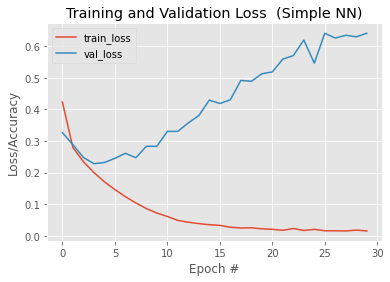

In [68]:
# строим графики потерь и точности
N = np.arange(0, 30)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, historyCNN2.history["loss"], label="train_loss")
plt.plot(N, historyCNN2.history["val_loss"], label="val_loss")
#plt.plot(N, historyCNN2.history["accuracy"], label="train_acc")
#plt.plot(N, historyCNN2.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Loss  (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
#plt.savefig(args["plot"])

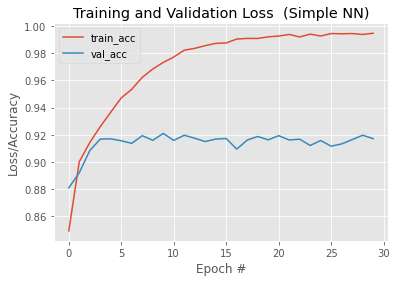

In [69]:
# строим графики потерь и точности
N = np.arange(0, 30)
plt.style.use("ggplot")
plt.figure()
#plt.plot(N, historyCNN2.history["loss"], label="train_loss")
#plt.plot(N, historyCNN2.history["val_loss"], label="val_loss")
plt.plot(N, historyCNN2.history["accuracy"], label="train_acc")
plt.plot(N, historyCNN2.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Loss  (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
#plt.savefig(args["plot"])

### визуализируем весовые коэффициенты для каждого отдельного сверточного слоя (с ядрами 8 на 8 для удобства). После одной эпохи обучения на первом слое получились вот такие коэффициенты:

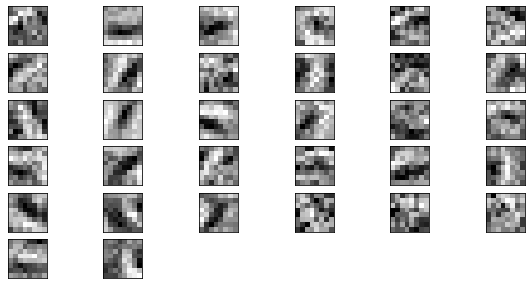

In [7]:
Image(filename='kernels.png')